# Numpy Implementation

## Generate training data

In [1]:
import numpy as np
from sklearn.cluster import KMeans

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin

In [2]:
X, y = make_blobs(n_samples=484, centers=8, n_features=512, random_state=0)

## Cluster predictions and pairs

In [5]:
def generate_cluster_predictions(data):

    # Generate 8 clusters and find centroids
    kmeans = KMeans(n_clusters=8, random_state=42).fit(data)
    y_kmeans = kmeans.predict(data)
    return y_kmeans, kmeans

def generate_pairs(data,y):
    # Generate training pair
    y.shape
    training_pairs=[]
    for ix in range(len(y)):
        # print(data[0].shape)
        training_pairs.append((data[ix],y[ix]))

    len(training_pairs)
    #print(training_pairs[0])
    return training_pairs

In [6]:
# Generate predictions and centroids
y_pred,model=generate_cluster_predictions(X)
pairs=generate_pairs(X,y_pred)
#pairs[0]

In [7]:
print(X.shape)

(484, 512)


In [ ]:
y_pred

array([2, 3, 0, 1, 4, 0, 1, 4, 0, 3, 7, 7, 3, 7, 7, 3, 3, 5, 6, 3, 6, 3,
       7, 3, 4, 5, 3, 4, 5, 0, 3, 4, 6, 7, 1, 2, 5, 0, 2, 3, 0, 7, 0, 1,
       5, 6, 4, 2, 2, 6, 6, 4, 5, 4, 6, 5, 3, 7, 0, 5, 6, 4, 5, 0, 2, 1,
       7, 5, 7, 7, 4, 0, 0, 1, 1, 6, 3, 6, 2, 6, 7, 2, 2, 5, 3, 6, 5, 4,
       3, 2, 2, 2, 4, 0, 0, 4, 7, 1, 1, 2, 7, 0, 0, 6, 3, 1, 6, 6, 7, 4,
       0, 1, 0, 7, 3, 2, 7, 4, 0, 1, 1, 1, 5, 0, 4, 6, 3, 3, 5, 6, 5, 4,
       2, 4, 4, 3, 0, 4, 2, 4, 2, 7, 5, 1, 1, 1, 4, 4, 7, 4, 5, 5, 1, 4,
       1, 7, 4, 6, 3, 4, 7, 6, 4, 7, 3, 5, 0, 4, 4, 2, 2, 1, 1, 2, 6, 6,
       1, 2, 5, 4, 5, 7, 7, 3, 5, 2, 4, 2, 6, 2, 6, 3, 1, 0, 3, 1, 0, 1,
       5, 4, 7, 2, 6, 5, 5, 6, 1, 4, 3, 7, 2, 5, 3, 2, 5, 4, 6, 1, 0, 1,
       5, 4, 7, 0, 4, 1, 6, 7, 2, 1, 3, 6, 5, 1, 0, 3, 5, 7, 5, 0, 6, 1,
       2, 4, 2, 3, 0, 7, 0, 5, 0, 0, 6, 5, 2, 1, 5, 0, 4, 0, 6, 2, 1, 5,
       5, 0, 7, 7, 0, 4, 7, 6, 6, 5, 3, 3, 7, 6, 2, 1, 6, 7, 5, 3, 0, 5,
       5, 7, 6, 4, 5, 3, 0, 5, 2, 3, 0, 4, 2, 3, 6,

In [ ]:
pairs

AttributeError: ignored

In [ ]:
y_pred.shape

(484,)

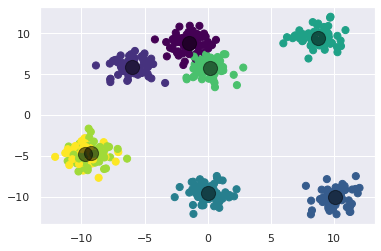

In [8]:
# Visualization for embed 2,3
plt.scatter(X[:, 4], X[:, 38], c=y, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 4], centers[:, 38], c='black', s=200, alpha=0.5);

## Generate distances

In [ ]:
def get_cluster_distance(records,k_num, data, centroids):

    # Empty output matrix
    output=np.empty(shape=[records,k_num])

    # Calculate euclidean distnace
    for i in range(records):
        for k in range(k_num):
            output[i,k]= np.linalg.norm(data[i]-centroids[k])
    return output


distances=get_cluster_distance(484,8, X, model.cluster_centers_)
distances

array([[192.87425499, 184.3876015 ,  23.01618959, ..., 186.25818566,
        180.26406163, 187.19454604],
       [189.94086398, 190.85118772, 205.60118712, ..., 191.89290605,
        193.63553972, 191.35781254],
       [ 21.42660499, 183.8824559 , 190.68531808, ..., 192.47992701,
        190.95821906, 177.10041534],
       ...,
       [190.40012415, 189.11588659, 202.9385015 , ..., 189.6889327 ,
        191.23884618, 191.88134746],
       [190.67680024, 190.94884299, 203.39164615, ..., 191.13029361,
        193.95676169, 191.45337852],
       [191.1556551 , 189.10499452, 203.15711076, ..., 189.98171474,
        192.39900542, 192.63363142]])

## Verify distance

In [ ]:
def verify(distances,pairs):
    fail=False
    for ix in range(484):
      print(pairs[ix][1])
      if np.argmin(distances[ix]) != pairs[ix][1]:
        fail=True
        print(ix)
    if fail:
      print("Verification failed")
    else:
      print("Works fine")

verify(distances,pairs)

2
3
0
1
4
0
1
4
0
3
7
7
3
7
7
3
3
5
6
3
6
3
7
3
4
5
3
4
5
0
3
4
6
7
1
2
5
0
2
3
0
7
0
1
5
6
4
2
2
6
6
4
5
4
6
5
3
7
0
5
6
4
5
0
2
1
7
5
7
7
4
0
0
1
1
6
3
6
2
6
7
2
2
5
3
6
5
4
3
2
2
2
4
0
0
4
7
1
1
2
7
0
0
6
3
1
6
6
7
4
0
1
0
7
3
2
7
4
0
1
1
1
5
0
4
6
3
3
5
6
5
4
2
4
4
3
0
4
2
4
2
7
5
1
1
1
4
4
7
4
5
5
1
4
1
7
4
6
3
4
7
6
4
7
3
5
0
4
4
2
2
1
1
2
6
6
1
2
5
4
5
7
7
3
5
2
4
2
6
2
6
3
1
0
3
1
0
1
5
4
7
2
6
5
5
6
1
4
3
7
2
5
3
2
5
4
6
1
0
1
5
4
7
0
4
1
6
7
2
1
3
6
5
1
0
3
5
7
5
0
6
1
2
4
2
3
0
7
0
5
0
0
6
5
2
1
5
0
4
0
6
2
1
5
5
0
7
7
0
4
7
6
6
5
3
3
7
6
2
1
6
7
5
3
0
5
5
7
6
4
5
3
0
5
2
3
0
4
2
3
6
4
4
4
0
7
1
1
6
2
2
7
7
7
3
2
0
5
7
6
5
0
7
3
0
3
2
5
1
0
3
1
2
4
1
2
7
4
5
2
4
5
2
7
6
3
3
4
6
5
4
7
6
0
2
3
1
5
0
0
1
4
7
3
2
1
3
4
6
3
0
6
5
2
4
6
7
1
6
3
4
7
0
6
3
3
2
1
2
0
2
7
6
2
0
7
3
5
5
0
2
4
7
7
0
4
7
1
2
7
7
0
1
2
2
1
6
3
4
3
5
1
4
7
4
5
7
3
1
5
1
1
6
1
3
6
5
7
6
1
1
3
0
6
5
1
4
6
0
2
5
6
1
4
1
0
2
7
2
1
6
2
6
2
3
0
7
5
5
2
0
3
6
5
1
6
3
2
6
0
0
3
3
3
Works fine


# Pytorch Implementation

In [ ]:
!pip install kmeans-pytorch

import torch
import numpy as np
import matplotlib.pyplot as plt
from kmeans_pytorch import kmeans, kmeans_predict
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin

# set random seed
np.random.seed(10)


# set device
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from functools import partial

import numpy as np
import torch
from tqdm import tqdm

#from .soft_dtw_cuda import SoftDTW


def initialize(X, num_clusters, seed):
    """
    initialize cluster centers
    :param X: (torch.tensor) matrix
    :param num_clusters: (int) number of clusters
    :param seed: (int) seed for kmeans
    :return: (np.array) initial state
    """
    num_samples = len(X)
    if seed == None:
        indices = np.random.choice(num_samples, num_clusters, replace=False)
    else:
        np.random.seed(seed) ; indices = np.random.choice(num_samples, num_clusters, replace=False)
    initial_state = X[indices]
    return initial_state


def kmeans_0(
        X,
        num_clusters,
        distance='euclidean',
        cluster_centers=[],
        tol=1e-4,
        tqdm_flag=True,
        iter_limit=0,
        device=torch.device('cpu'),
        gamma_for_soft_dtw=0.001,
        seed=None,
):
    """
    perform kmeans
    :param X: (torch.tensor) matrix
    :param num_clusters: (int) number of clusters
    :param distance: (str) distance [options: 'euclidean', 'cosine'] [default: 'euclidean']
    :param seed: (int) seed for kmeans
    :param tol: (float) threshold [default: 0.0001]
    :param device: (torch.device) device [default: cpu]
    :param tqdm_flag: Allows to turn logs on and off
    :param iter_limit: hard limit for max number of iterations
    :param gamma_for_soft_dtw: approaches to (hard) DTW as gamma -> 0
    :return: (torch.tensor, torch.tensor) cluster ids, cluster centers
    """
    if tqdm_flag:
        print(f'running k-means on {device}..')

    if distance == 'euclidean':
        pairwise_distance_function = partial(pairwise_distance, device=device, tqdm_flag=tqdm_flag)
    elif distance == 'cosine':
        pairwise_distance_function = partial(pairwise_cosine, device=device)
    elif distance == 'soft_dtw':
        sdtw = SoftDTW(use_cuda=device.type == 'cuda', gamma=gamma_for_soft_dtw)
        pairwise_distance_function = partial(pairwise_soft_dtw, sdtw=sdtw, device=device)
    else:
        raise NotImplementedError

    # convert to float
    X = X.float()

    # transfer to device
    X = X.to(device)

    # initialize
    if type(cluster_centers) == list:  # ToDo: make this less annoyingly weird
        initial_state = initialize(X, num_clusters, seed=seed)
    else:
        if tqdm_flag:
            print('resuming')
        # find data point closest to the initial cluster center
        initial_state = cluster_centers
        dis = pairwise_distance_function(X, initial_state)
        choice_points = torch.argmin(dis, dim=0)
        initial_state = X[choice_points]
        initial_state = initial_state.to(device)

    iteration = 0
    if tqdm_flag:
        tqdm_meter = tqdm(desc='[running kmeans]')
    while True:

        dis = pairwise_distance_function(X, initial_state)

        choice_cluster = torch.argmin(dis, dim=1)

        initial_state_pre = initial_state.clone()

        for index in range(num_clusters):
            selected = torch.nonzero(choice_cluster == index).squeeze().to(device)

            selected = torch.index_select(X, 0, selected)

            # https://github.com/subhadarship/kmeans_pytorch/issues/16
            if selected.shape[0] == 0:
                selected = X[torch.randint(len(X), (1,))]

            initial_state[index] = selected.mean(dim=0)

        center_shift = torch.sum(
            torch.sqrt(
                torch.sum((initial_state - initial_state_pre) ** 2, dim=1)
            ))
        print(center_shift)

        # increment iteration
        iteration = iteration + 1

        # update tqdm meter
        if tqdm_flag:
            tqdm_meter.set_postfix(
                iteration=f'{iteration}',
                center_shift=f'{center_shift ** 2:0.6f}',
                tol=f'{tol:0.6f}'
            )
            tqdm_meter.update()
        if center_shift ** 2 < tol:
            break
        if iter_limit != 0 and iteration >= iter_limit:
            break

    return choice_cluster.cpu(), initial_state.cpu()


def kmeans_predict(
        X,
        cluster_centers,
        distance='euclidean',
        device=torch.device('cpu'),
        gamma_for_soft_dtw=0.001,
        tqdm_flag=True
):
    """
    predict using cluster centers
    :param X: (torch.tensor) matrix
    :param cluster_centers: (torch.tensor) cluster centers
    :param distance: (str) distance [options: 'euclidean', 'cosine'] [default: 'euclidean']
    :param device: (torch.device) device [default: 'cpu']
    :param gamma_for_soft_dtw: approaches to (hard) DTW as gamma -> 0
    :return: (torch.tensor) cluster ids
    """
    if tqdm_flag:
        print(f'predicting on {device}..')

    if distance == 'euclidean':
        pairwise_distance_function = partial(pairwise_distance, device=device, tqdm_flag=tqdm_flag)
    elif distance == 'cosine':
        pairwise_distance_function = partial(pairwise_cosine, device=device)
    elif distance == 'soft_dtw':
        sdtw = SoftDTW(use_cuda=device.type == 'cuda', gamma=gamma_for_soft_dtw)
        pairwise_distance_function = partial(pairwise_soft_dtw, sdtw=sdtw, device=device)
    else:
        raise NotImplementedError

    # convert to float
    X = X.float()

    # transfer to device
    X = X.to(device)

    dis = pairwise_distance_function(X, cluster_centers)
    choice_cluster = torch.argmin(dis, dim=1)

    return choice_cluster.cpu()


def pairwise_distance(data1, data2, device=torch.device('cpu'), tqdm_flag=True):
    if tqdm_flag:
        print(f'device is :{device}')
    
    # transfer to device
    data1, data2 = data1.to(device), data2.to(device)

    # N*1*M
    A = data1.unsqueeze(dim=1)

    # 1*N*M
    B = data2.unsqueeze(dim=0)

    dis = (A - B) ** 2.0
    # return N*N matrix for pairwise distance
    dis = dis.sum(dim=-1).squeeze()
    return dis


def pairwise_cosine(data1, data2, device=torch.device('cpu')):
    # transfer to device
    data1, data2 = data1.to(device), data2.to(device)

    # N*1*M
    A = data1.unsqueeze(dim=1)

    # 1*N*M
    B = data2.unsqueeze(dim=0)

    # normalize the points  | [0.3, 0.4] -> [0.3/sqrt(0.09 + 0.16), 0.4/sqrt(0.09 + 0.16)] = [0.3/0.5, 0.4/0.5]
    A_normalized = A / A.norm(dim=-1, keepdim=True)
    B_normalized = B / B.norm(dim=-1, keepdim=True)

    cosine = A_normalized * B_normalized

    # return N*N matrix for pairwise distance
    cosine_dis = 1 - cosine.sum(dim=-1).squeeze()
    return cosine_dis


def pairwise_soft_dtw(data1, data2, sdtw=None, device=torch.device('cpu')):
    if sdtw is None:
        raise ValueError('sdtw is None - initialize it with SoftDTW')

    # transfer to device
    data1, data2 = data1.to(device), data2.to(device)

    # (batch_size, seq_len, feature_dim=1)
    A = data1.unsqueeze(dim=2)

    # (cluster_size, seq_len, feature_dim=1)
    B = data2.unsqueeze(dim=2)

    distances = []
    for b in B:
        # (1, seq_len, 1)
        b = b.unsqueeze(dim=0)
        A, b = torch.broadcast_tensors(A, b)
        # (batch_size, 1)
        sdtw_distance = sdtw(b, A).view(-1, 1)
        distances.append(sdtw_distance)

    # (batch_size, cluster_size)
    dis = torch.cat(distances, dim=1)
    return dis

# Generate training data

In [ ]:
# data

X, y = make_blobs(n_samples=484, centers=8, n_features=512, random_state=0)
X = torch.from_numpy(X)
y = torch.from_numpy(y)

In [ ]:
# k-means
cluster_ids_x, cluster_centers = kmeans_0(
    X=X, num_clusters=8, distance='euclidean', device=device
)

running k-means on cuda:0..


[running kmeans]: 3it [00:00, 67.79it/s, center_shift=0.000000, iteration=3, tol=0.000100]

device is :cuda:0
tensor(248.2250, device='cuda:0')
device is :cuda:0
tensor(13.3878, device='cuda:0')
device is :cuda:0
tensor(0., device='cuda:0')


In [ ]:
cluster_ids_y = kmeans_predict(
    X, cluster_centers, 'euclidean', device=device
)

predicting on cuda:0..
device is :cuda:0


In [ ]:
cluster_ids_y

tensor([2, 1, 7, 3, 6, 7, 3, 6, 7, 1, 4, 4, 1, 4, 4, 1, 1, 0, 2, 1, 2, 1, 4, 1,
        6, 5, 1, 6, 0, 7, 1, 6, 2, 4, 3, 2, 0, 7, 2, 1, 7, 4, 7, 3, 5, 2, 6, 2,
        2, 2, 2, 6, 0, 6, 2, 0, 1, 4, 7, 0, 2, 6, 5, 7, 2, 3, 4, 0, 4, 4, 6, 7,
        7, 3, 3, 2, 1, 2, 2, 2, 4, 2, 2, 0, 1, 2, 5, 6, 1, 2, 2, 2, 6, 7, 7, 6,
        4, 3, 3, 2, 4, 7, 7, 2, 1, 3, 2, 2, 4, 6, 7, 3, 7, 4, 1, 2, 4, 6, 7, 3,
        3, 3, 0, 7, 6, 2, 1, 1, 0, 2, 0, 6, 2, 6, 6, 1, 7, 6, 2, 6, 2, 4, 0, 3,
        3, 3, 6, 6, 4, 6, 0, 0, 3, 6, 3, 4, 6, 2, 1, 6, 4, 2, 6, 4, 1, 0, 7, 6,
        6, 2, 2, 3, 3, 2, 2, 2, 3, 2, 0, 6, 5, 4, 4, 1, 0, 2, 6, 2, 2, 2, 2, 1,
        3, 7, 1, 3, 7, 3, 0, 6, 4, 2, 2, 0, 0, 2, 3, 6, 1, 4, 2, 0, 1, 2, 0, 6,
        2, 3, 7, 3, 0, 6, 4, 7, 6, 3, 2, 4, 2, 3, 1, 2, 0, 3, 7, 1, 0, 4, 0, 7,
        2, 3, 2, 6, 2, 1, 7, 4, 7, 0, 7, 7, 2, 0, 2, 3, 0, 7, 6, 7, 2, 2, 3, 0,
        5, 7, 4, 4, 7, 6, 4, 2, 2, 0, 1, 1, 4, 2, 2, 3, 2, 4, 0, 1, 7, 5, 0, 4,
        2, 6, 5, 1, 7, 5, 2, 1, 7, 6, 2,

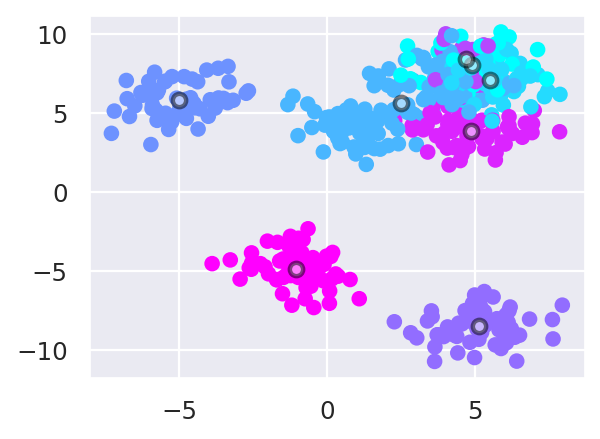

In [ ]:
# plot
plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(X[:, 0], X[:, 1], c=cluster_ids_y, cmap='cool')
plt.scatter(
    cluster_centers[:, 0], cluster_centers[:, 1],
    c='white',
    alpha=0.5,
    edgecolors='black',
    linewidths=2
)
plt.show()

In [ ]:
def get_cluster_distance(records,k_num, data, centroids):

    # Empty output matrix
    output=torch.empty((records,k_num), dtype=torch.float32, requires_grad=False)

    # Calculate euclidean distance
    for i in range(records):
        for k in range(k_num):
            output[i,k]= np.linalg.norm(data[i]-centroids[k])
    return output


distances=get_cluster_distance(484,8, X, cluster_centers)
distances.shape

torch.Size([484, 8])

In [ ]:
distances

tensor([[186.5065, 203.4884,  91.4139,  ..., 185.6040, 188.7473, 192.8743],
        [192.0405,  22.1584, 178.5474,  ..., 191.5455, 194.8484, 189.9409],
        [192.5615, 191.3663, 168.4894,  ..., 192.3351, 190.6220,  21.4266],
        ...,
        [189.8403,  23.2006, 175.7082,  ..., 189.3310, 192.5312, 190.4001],
        [191.2789,  22.1020, 177.4411,  ..., 190.7802, 194.4015, 190.6768],
        [190.1296,  23.0284, 176.4620,  ..., 189.6344, 194.5762, 191.1557]])

In [ ]:
def verify(distances,pairs):
    fail=False
    for ix in range(484):
      if np.argmin(distances[ix]) != cluster_ids_y[ix]:
        fail=True
        print(ix)
    if fail:
      print("Verification failed")
    else:
      print("Works fine")

verify(distances,cluster_ids_y)

Works fine


In [ ]:
cluster_ids_y[0]

tensor(2)

In [ ]:
cluster_centers

tensor([[ 2.4926,  5.6351, -1.4532,  ..., -1.3369, -8.0737, -1.1193],
        [-0.0317,  6.9557,  4.3502,  ...,  5.5675, -0.8562, -2.9771],
        [-1.1379, -4.8174,  7.8806,  ..., -6.7186, -9.2239, -6.2377],
        ...,
        [ 5.1428, -8.5299,  9.7352,  ...,  0.5986, -0.6724, -9.8396],
        [ 6.4569,  6.6841,  0.3466,  ..., -8.2289, -0.5526,  3.4159],
        [ 5.4933,  7.0879, -0.2471,  ..., -8.5794, -0.1048,  4.4144]])

In [ ]:
import numpy as np 
x = torch.rand([484, 512], dtype=torch.float32, requires_grad=True)
# k-means
cluster_ids_x, cluster_centers = kmeans_0(
    X=x, num_clusters=8, distance='euclidean', device=device
)
cluster_ids_y = kmeans_predict(
    x, cluster_centers, 'euclidean', device=device
)

centroid_array = torch.empty([484,512], dtype=x.dtype, requires_grad=False)
for i, label in enumerate(cluster_ids_y):
  centroid_array[i] = cluster_centers[label]

x.retain_grad()
dist = torch.sub(x, centroid_array)
Q=dist
Q.sum().backward()
print(x.grad)

running k-means on cuda:0..


[running kmeans]: 4it [00:00, 97.08it/s, center_shift=0.000000, iteration=4, tol=0.000100]

device is :cuda:0
tensor(47.5625, device='cuda:0', grad_fn=<SumBackward0>)
device is :cuda:0
tensor(1.0611, device='cuda:0', grad_fn=<SumBackward0>)
device is :cuda:0
tensor(0.4654, device='cuda:0', grad_fn=<SumBackward0>)
device is :cuda:0
tensor(0., device='cuda:0', grad_fn=<SumBackward0>)
predicting on cuda:0..
device is :cuda:0


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [ ]:
centroid_array

tensor([[0.5508, 0.4921, 0.4812,  ..., 0.5495, 0.5767, 0.4938],
        [0.4503, 0.5914, 0.5590,  ..., 0.5153, 0.3829, 0.5702],
        [0.5508, 0.4921, 0.4812,  ..., 0.5495, 0.5767, 0.4938],
        ...,
        [0.4503, 0.5914, 0.5590,  ..., 0.5153, 0.3829, 0.5702],
        [0.4503, 0.5914, 0.5590,  ..., 0.5153, 0.3829, 0.5702],
        [0.4503, 0.5914, 0.5590,  ..., 0.5153, 0.3829, 0.5702]],
       grad_fn=<CopySlices>)